<a href="https://colab.research.google.com/github/LuisaJ95/Introduccion_Ciencia_De_Datos/blob/main/sc_1_luisa_jimenez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📘 Proyecto de Ciencia de Datos
Definición de la base de datos y visualización básica

Preparación de la fuente de datos y librerías

In [30]:
# Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Instalar librerías necesarias
!pip install pingouin seaborn

# Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from sklearn.feature_selection import mutual_info_regression

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 6.0 MB/s eta 0:00:00


In [ ]:


# Datos
from google.colab import drive
drive.mount('/content/drive')

# Ruta del archivo en Google Drive
ruta_txt = "/content/drive/My Drive/II SEM-MASTER/Estad. Multivariada/donaciones.txt"

# Crear DataSet
df = pd.read_csv(ruta_txt, sep='\t', encoding='latin-1')



Mounted at /content/drive


# **1. Introducción**

**1. Breve presentación del problema o pregunta de investigación.**



¿Cuál debería ser el diseño de una cadena de abastecimiento que contribuya a la disminución de desperdicios de alimentos perecederos a través de donaciones que tenga en consideración los requerimientos e incentivos operativos y normativos en Colombia?

**2. Contexto: ¿por qué es relevante este problema?**



La problemática de las pérdidas y desperdicios de alimentos (PDA) es crítica a nivel global y nacional, con impactos económicos, sociales y ambientales significativos. En Colombia, se desperdician grandes cantidades de alimentos mientras más de la mitad de la población enfrenta inseguridad alimentaria, generando además emisiones contaminantes y pérdidas económicas del 1,3% del PIB. Las causas son múltiples: desde ineficiencias en la producción, distribución y consumo, hasta vacíos normativos y logísticos. Aunque el país ha avanzado en legislación (Ley 1990 de 2019 y Ley 2380 de 2024), los incentivos fiscales no se corresponden con la limitada capacidad logística, que solo permite recuperar el 12% del potencial alimentario disponible. Esto evidencia la urgencia de transformar la cadena de recuperación alimentaria mediante modelos logísticos más eficientes, coordinados y adaptados al nuevo marco legal.

3. Relación entre el problema y la base de datos seleccionada.


El problema de investigación gira en torno a una empresa del sector alimentos carnicos, en dónde tiene una excelente trazabilidad en cuanto al desperdicio de alimentos en una lìnea que es las "devoluciones", sin embargo, las "donaciones" son un tema de interés y la data proporciona registros desde el 2022.

# **2. Descripción de la base de datos**

- Número de registros y variables.
- Breve descripción de las variables más importantes.
- Tipos de datos (numéricas, categóricas, fechas, texto, etc.).

In [ ]:
# Visualizar una pequeña muestra de los datos
df.head()

,Concatenado,Semana,Mes Calendario,Factura,FechaFact#,Material,DenominaciÃ³n,Cantidad,UMB,C# Motivo ped,...,Prod-UbicaciÃ³n,Planta,Red,Negocio,aÃ±o,Oficina de ventas,Descripcion de la oficina,Ord/Ext,Causales,Causales NUEVOS
0,1001069NN47,2023.12,marzo,INN558727,2023-03-25 00:00:00.000,1001069,Salch. Viena RICA x 150 g,3.0,UN,D19,...,1001069NN47,MedellÃ­n,Red Comercial,Comercial Nutresa,2023,10,R BogotÃ¡,LV Ordinaria,Baja RotaciÃ³n,Baja RotaciÃ³n
1,1011774NN47,2023.12,marzo,INN558727,2023-03-25 00:00:00.000,1011774,Salch. Frankfurt ZENU 360g,1.0,UN,D19,...,1011774NN47,MedellÃ­n,Red Comercial,Comercial Nutresa,2023,10,R BogotÃ¡,LV Ordinaria,Baja RotaciÃ³n,Baja RotaciÃ³n
2,1035355NNB1,2022.52,diciembre,INN534823,2022-12-26 00:00:00.000,1035355,2 Jmn. PIETRAN Estd. x 100 g SIN C,2.0,UN,D19,...,1035355NNB1,MedellÃ­n,Red Comercial,Negocio CÃ¡rnico,2022,NaN,R Cali,D. Ordinaria,Baja RotaciÃ³n,Baja RotaciÃ³n
3,1035355NNB1,2022.52,diciembre,INN534830,2022-12-26 00:00:00.000,1035355,2 Jmn. PIETRAN Estd. x 100 g SIN C,1.0,UN,D19,...,1035355NNB1,MedellÃ­n,Red Comercial,Negocio CÃ¡rnico,2022,NaN,R Cali,D. Ordinaria,Baja RotaciÃ³n,Baja RotaciÃ³n
4,1000145NN47,2023.12,marzo,INN558727,2023-03-25 00:00:00.000,1000145,Cne. Diablo ZENU x 80 g,1.0,UN,D19,...,1000145NN47,MedellÃ­n,Red Comercial,Comercial Nutresa,2023,10,R BogotÃ¡,LV Ordinaria,Baja RotaciÃ³n,Baja RotaciÃ³n


In [ ]:
# Número de registros y variables
print(f"Número de registros: {df.shape[0]}")
print(f"Número de variables: {df.shape[1]}")

Número de registros: 52726
Número de variables: 42


In [ ]:
# Tipos de datos
print("\nTipos de datos por variable:")
print(df.dtypes.value_counts())


Tipos de datos por variable:
object     32
float64     5
int64       5
Name: count, dtype: int64


In [ ]:
# Clasificación de variables
categoricas = df.select_dtypes(include=['object']).columns.tolist()
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("🔹 Variables categóricas:")
print("\n".join([f"- {col}" for col in categoricas]))

print("\n🔸 Variables numéricas:")
print("\n".join([f"- {col}" for col in numericas]))

🔹 Variables categóricas:
- Concatenado
- Mes Calendario
- Factura
- FechaFact#
- DenominaciÃ³n
- UMB
- C# Motivo ped
- C# Centro
- Clase de Doc Ventas
- Ofc# Ventas
- Almacen
- Lote
- Texto
- Motivo de pedido
- Centro
- Regional
- ClasificaciÃ³n
- Tipo de Desguace
- Motivo de desguace
- CategorÃ­a 
- SubcategorÃ­a
- Linea
- Marca
- Prod-UbicaciÃ³n
- Planta
- Red
- Negocio
- Oficina de ventas
- Descripcion de la oficina
- Ord/Ext
- Causales
- Causales NUEVOS

🔸 Variables numéricas:
- Semana
- Material
- Cantidad
- Doc#vtas#
- Rsp Pa
- Valor
- C# Costos
- Peso Kg
- Desguace KG
- aÃ±o


In [ ]:
# Descripción general
print("\nDescripción de variables numéricas:")
print(df.describe())


Descripción de variables numéricas:
             Semana      Material      Cantidad     Doc#vtas#        Rsp Pa  \
count  52726.000000  5.272600e+04  52726.000000  5.272600e+04  5.272600e+04   
mean    2023.232760  1.146070e+06     23.472956  7.183421e+09  2.650774e+07   
std        0.821904  4.213562e+05    118.061618  1.043781e+07  8.535158e+06   
min     2022.010000  0.000000e+00      0.008000  7.165578e+09  1.006954e+07   
25%     2022.390000  1.000346e+06      1.000000  7.174488e+09  3.100000e+07   
50%     2023.240000  1.034555e+06      4.000000  7.183103e+09  3.100001e+07   
75%     2024.140000  1.047823e+06     12.000000  7.192975e+09  3.100001e+07   
max     2024.520000  2.031254e+06   5990.000000  7.201820e+09  3.300047e+07   

              Valor     C# Costos       Peso Kg   Desguace KG          aÃ±o  
count  5.272600e+04  4.795800e+04  52726.000000  52726.000000  52726.000000  
mean   1.225071e+05  1.141443e+07      0.398012      9.565833   2022.958180  
std    6.292265e+

# **3. Análisis inicial de las variables**

- Identificación de las variables clave.
- Conteo de valores, tipos de datos y valores faltantes.

In [ ]:
# Conteo de valores faltantes ordenado de mayor a menor
faltantes = df.isnull().sum().sort_values(ascending=False)

print("\nConteo de valores faltantes por variable:")
print(faltantes[faltantes > 0])  # Solo muestra variables con al menos un valor faltante


Conteo de valores faltantes por variable:
SubcategorÃ­a                8333
Texto                        7024
Oficina de ventas            5005
Ofc# Ventas                  4931
Almacen                      4899
C# Costos                    4768
Concatenado                  1774
ClasificaciÃ³n                222
Linea                         102
Descripcion de la oficina      74
Centro                         16
Regional                       16
Negocio                        16
Marca                           2
DenominaciÃ³n                   1
CategorÃ­a                      1
dtype: int64


In [ ]:
# Conteo de valores únicos por variable
print("\nConteo de valores únicos por variable:")
print(df.nunique().sort_values(ascending=False))


Conteo de valores únicos por variable:
Valor                        22097
Lote                         15098
Factura                       7920
Doc#vtas#                     7770
Desguace KG                   5360
Prod-UbicaciÃ³n               3505
Concatenado                   3475
Texto                         2331
Cantidad                      1634
FechaFact#                     955
Material                       668
DenominaciÃ³n                  568
Peso Kg                        298
Semana                         156
Almacen                        104
Rsp Pa                          60
Centro                          60
C# Centro                       59
Linea                           48
Regional                        28
SubcategorÃ­a                   25
Causales NUEVOS                 21
ClasificaciÃ³n                  20
Oficina de ventas               18
Ofc# Ventas                     18
Motivo de pedido                17
C# Motivo ped                   16
CategorÃ­a     

In [ ]:
# Variables más importantes
variables_clave = ['Valor', 'Cantidad', 'Desguace KG', 'Material', 'C# Motivo ped', 'C# Centro', 'CategorÃ­a ', 'SubcategorÃ­a'
, 'Linea', 'Marca', 'Planta', 'Ord/Ext']
print("\nVista rápida de variables clave:")
print(df[variables_clave].head())
# Vista rápida de las variables clave
print("\nEstadísticas descriptivas de variables clave:")
print(df[variables_clave].describe())


Vista rápida de variables clave:
   Valor  Cantidad  Desguace KG  Material C# Motivo ped C# Centro  \
0   5232       3.0         0.45   1001069           D19      NN47   
1   3643       1.0         0.36   1011774           D19      NN47   
2   8762       2.0         0.40   1035355           D19      NNB1   
3   4381       1.0         0.20   1035355           D19      NNB1   
4   2854       1.0         0.08   1000145           D19      NN47   

            CategorÃ­a          SubcategorÃ­a                       Linea  \
0  Alimentos larga vida  Larga vida CÃ¡rnicos       Salchichas Larga vida   
1  Alimentos larga vida  Larga vida CÃ¡rnicos       Salchichas Larga vida   
2         Carnes frÃ­as               Tajados                      JamÃ³n   
3         Carnes frÃ­as               Tajados                      JamÃ³n   
4  Alimentos larga vida  Larga vida CÃ¡rnicos  Otros Larga vida CÃ¡rnicos   

      Marca     Planta       Ord/Ext  
0      Rica  MedellÃ­n  LV Ordinaria  
1     ZenÃ

# **4. Visualizaciones exploratorias básicas**

- Gráficos de dispersión para relaciones entre variables.
- Breve interpretación de lo que muestran las gráficas.
- Histogramas o gráficos de barras para variables numéricas y categóricas.

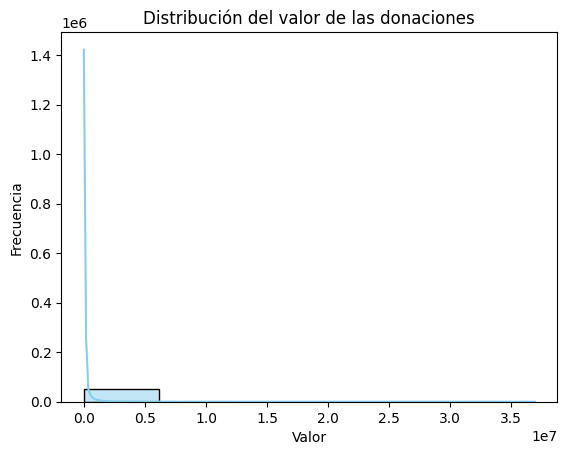

In [ ]:
# Histograma: distribución de Causal Donación
sns.histplot(df['Valor'], bins=6, kde=True, color='skyblue')
plt.title("Distribución del valor de las donaciones")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

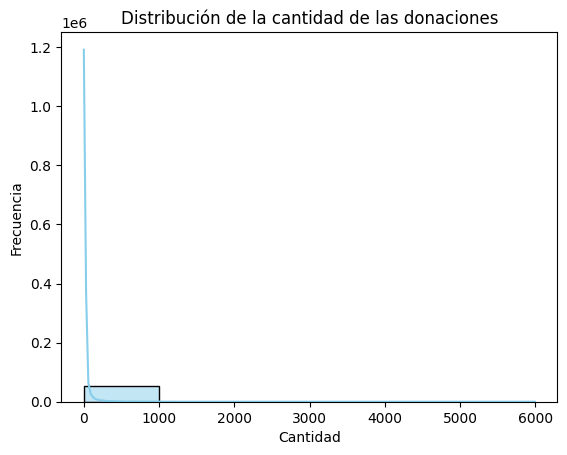

In [ ]:
# Histograma: distribución de la cantidad de las donaciones
sns.histplot(df['Cantidad'], bins=6, kde=True, color='skyblue')
plt.title("Distribución de la cantidad de las donaciones")
plt.xlabel("Cantidad")
plt.ylabel("Frecuencia")
plt.show()

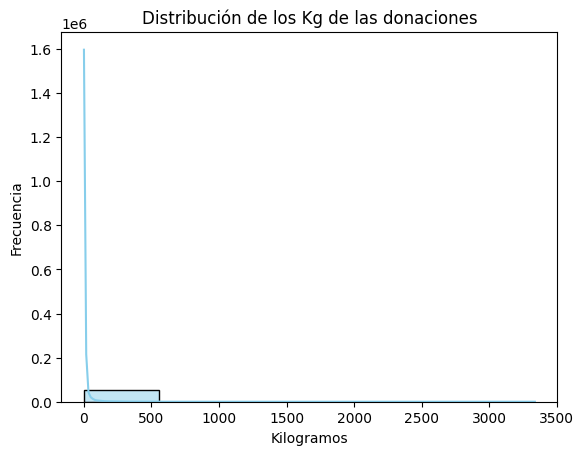

In [ ]:
# Histograma: distribución de los Kg de las donaciones
sns.histplot(df['Desguace KG'], bins=6, kde=True, color='skyblue')
plt.title("Distribución de los Kg de las donaciones")
plt.xlabel("Kilogramos")
plt.ylabel("Frecuencia")
plt.show()

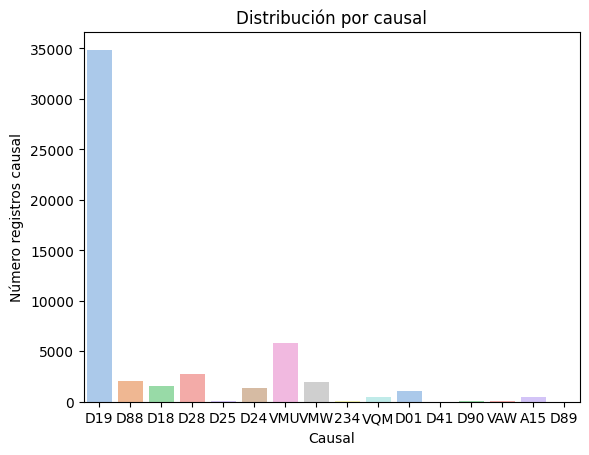

In [ ]:
# Gráfico de barras: Causal
sns.countplot(x='C# Motivo ped', data=df,hue='C# Motivo ped', palette='pastel',legend=False)
plt.title("Distribución por causal")
plt.xlabel("Causal")
plt.ylabel("Número registros causal")
plt.show()

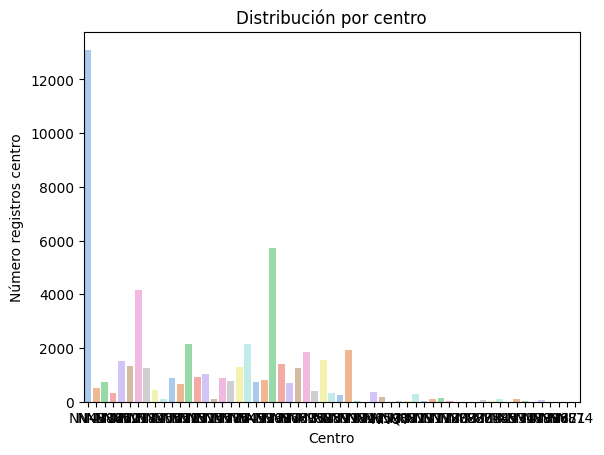

In [ ]:
# Gráfico de barras: Centro
sns.countplot(x='C# Centro', data=df,hue='C# Centro', palette='pastel',legend=False)
plt.title("Distribución por centro")
plt.xlabel("Centro")
plt.ylabel("Número registros centro")
plt.show()

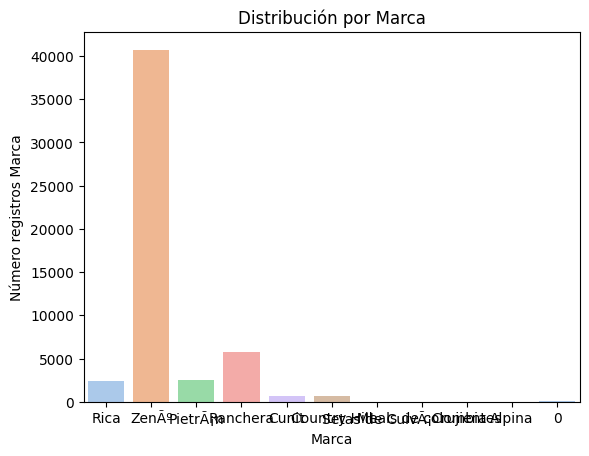

In [ ]:
# Gráfico de barras: Marca
sns.countplot(x='Marca', data=df,hue='Marca', palette='pastel',legend=False)
plt.title("Distribución por Marca")
plt.xlabel("Marca")
plt.ylabel("Número registros Marca")
plt.show()

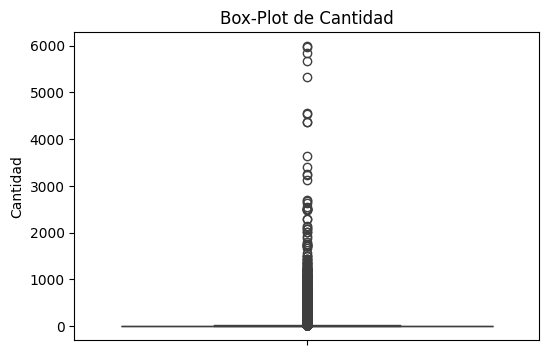

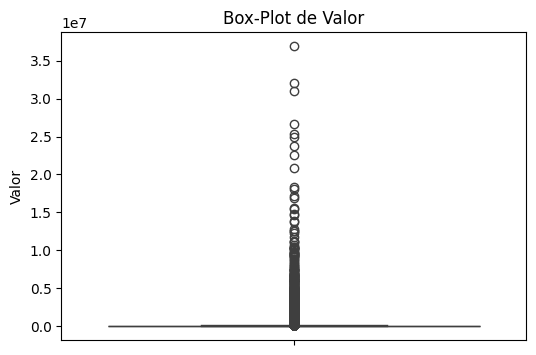

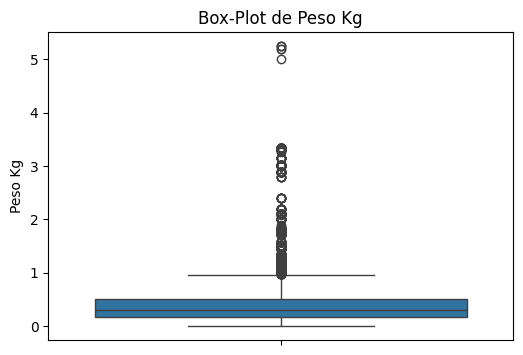

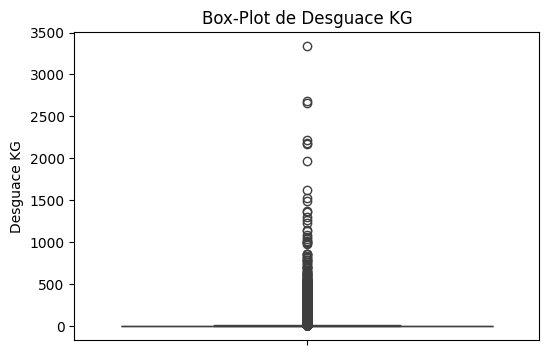

In [29]:
# Box-plot para variables numéricas
for col in ['Cantidad', 'Valor', 'Peso Kg', 'Desguace KG']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Box-Plot de {col}")
    plt.ylabel(col)
    plt.show()

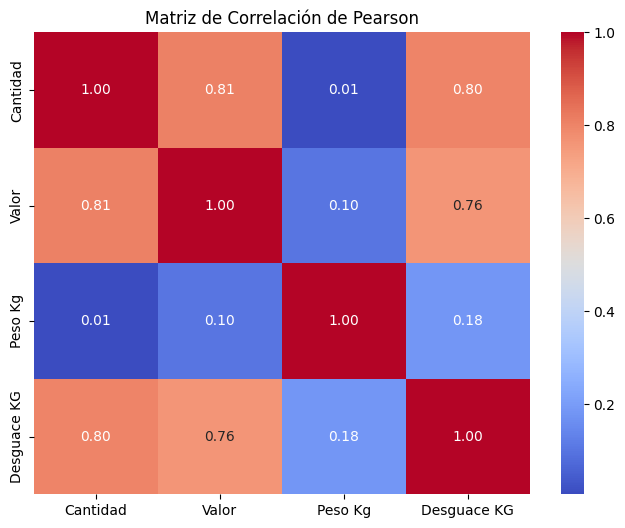

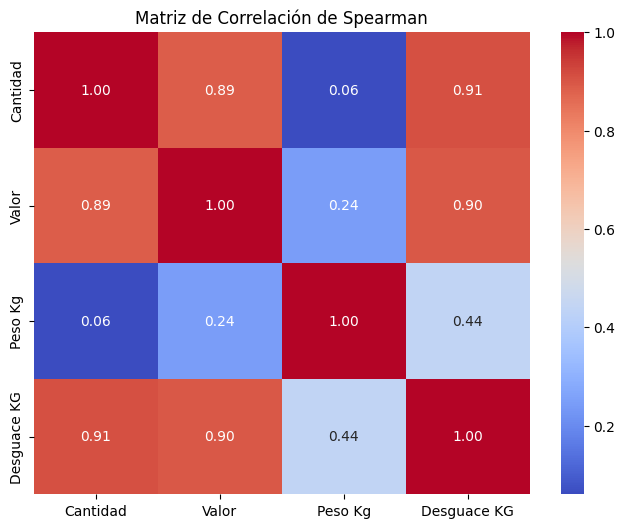

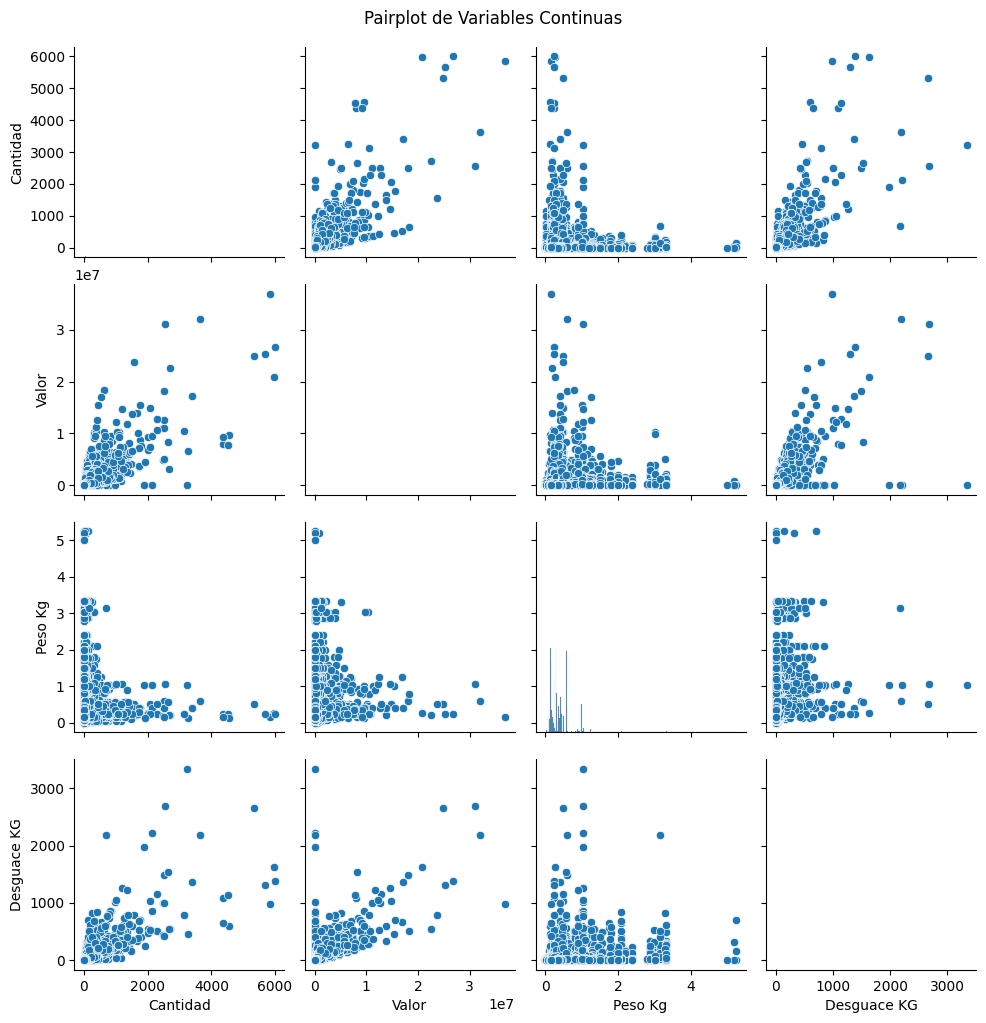

In [32]:
# Definir las variables continuas
variables_continuas = ['Cantidad', 'Valor', 'Peso Kg', 'Desguace KG']

# Filtrar solo las variables continuas
df_continuas = df[variables_continuas]

### 1. Matriz de Correlación de Pearson
corr_pearson = df_continuas.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación de Pearson")
plt.show()

### 2. Matriz de Correlación de Spearman
corr_spearman = df_continuas.corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación de Spearman")
plt.show()


### 3. Pairplot (Gráfico de dispersión entre variables)
sns.pairplot(df_continuas)
plt.suptitle("Pairplot de Variables Continuas", y=1.02)
plt.show()


1. Matriz de Correlación de Pearson
Mide la relación lineal entre dos variables.


2. Matriz de Correlación de Spearman
¿Qué mide?
Cómo cambia una variable con respecto a otra en términos de orden, sin asumir una relación lineal. (Diferente a Pearson, porque no asume una relación lineal.
Más robusto que Kendall para datos con más variabilidad.)


3. Pairplot (Gráficos de Dispersión): Si los puntos están dispersos aleatoriamente, la relación es débil o inexistente.

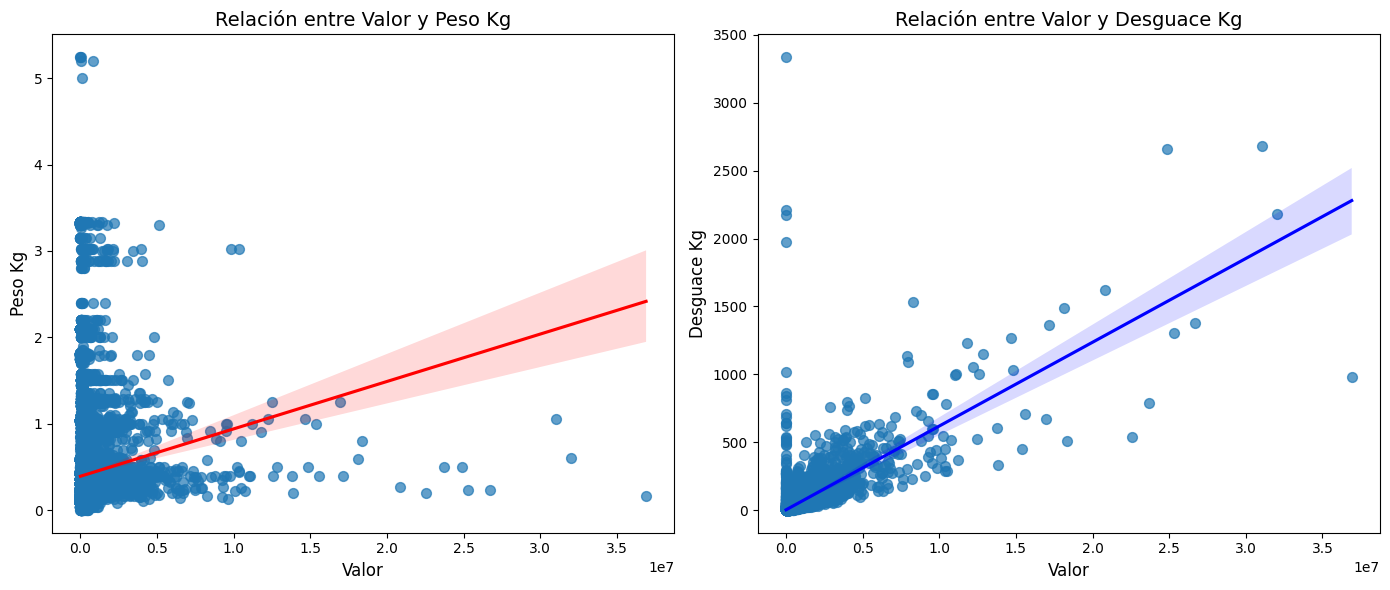

In [33]:
# Gráfico de dispersión con líneas de tendencia
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Valor y Peso Kg
sns.regplot(x='Valor', y='Peso Kg', data=df, ax=axes[0],
            scatter_kws={'s': 50, 'alpha': 0.7},
            line_kws={'color': 'red'})
axes[0].set_title('Relación entre Valor y Peso Kg', fontsize=14)
axes[0].set_xlabel('Valor', fontsize=12)
axes[0].set_ylabel('Peso Kg', fontsize=12)

# Valor y
sns.regplot(x='Valor', y='Desguace KG', data=df, ax=axes[1],
            scatter_kws={'s': 50, 'alpha': 0.7},
            line_kws={'color': 'blue'})
axes[1].set_title('Relación entre Valor y Desguace Kg', fontsize=14)
axes[1].set_xlabel('Valor', fontsize=12)
axes[1].set_ylabel('Desguace Kg', fontsize=12)

plt.tight_layout()
plt.show()

# **5. Interpretaciones iniciales**

¿Qué tendencias o patrones básicos se observan?

- Las variables continuas no tienen una distribución normal, están muy sesgadas hacia la derecha.

- La causal D19 es la más representativa de los datos.

- La marca zenú es la más representativa.

- Las variables continuas presentas un gran número de datos atípicos.

- Hay una relación muy fuerte entre valor y cantidad.

- Hay una relación muy fuerte entre Desguace Kg y cantidad.

- Hay una relación muy fuerte entre Desguace Kg y valor.

- El gráfico de dispersión reafirma la cantidad de Valores atípicos ausentes o una muestra poco diversa y la existencia quizá de poca variabilidad en las variables.

¿Qué limitaciones tiene la base de datos?

- Puede existir un sesgo en las variables continuas.
- Hay gran cantidad de valores atípicos.
- Las variables no están bien definidas.
- Hay muchas variables, se puede disminuír su tamaño.

¿Qué hipótesis iniciales podrían plantearse para análisis posteriores?

- Los valores de las donaciones pueden ser muy grandes en pocas ocaciones, sin embargo no se deberían eliminar ya que aportan información importante.

- La causal D19 y el Centro más recurrente de las donaciones pueden estar asociados a razones que se pueden responder con la data.

- Las cuatro variables continuas pueden estar aportando la misma información y ser redundantes.

# **6. Conclusiones**

- Resumen de los principales hallazgos iniciales.
- Reflexión sobre cómo este entregable contribuye al desarrollo del proyecto completo.


- Para las variables cuantitativas:
  - Las cuatro variables tienen un sesgo, se podrían transformar y reducir.
  - Se encuentran relaciones entre ellas: entre valor y cantidad, entre Desguace Kg y cantidad, entre Desguace Kg y valor.

- Para las variables cuantittaivas:
  - Hay variables como Causal y Centro que tienen la mayorìa de donaciones, vale la pena analizar estos datos.

# **7. Referencias**



- Miranda, A. (2024, 4 octubre). Bogotá lanza estrategia para reducir la pérdida y el desperdicio de cerca de 1,2 millones de toneladas de alimentos - Secretaría Distrital de Desarrollo Económico. Secretaría Distrital de Desarrollo Económico. https://desarrolloeconomico.gov.co/bogota-lanza-estrategia-para-reducir-la-perdida-y-el-desperdicio-de-cerca-de-12-millones-de-toneladas-de-alimentos/

- Broad Leib, E. M., Shapiro, M., Jagdagdorj, N., Hill, J., & Giguere, M. (2021). Guía legal: Leyes y políticas para la donación de alimentos – Colombia. The Global Food Donation Policy Atlas. Harvard Law School Food Law and Policy Clinic & The Global FoodBanking Network. Disponible en: https://www.foodbanking.org/wp-content/uploads/2023/02/The-Global-Food-Donation-Policy-Atlas_Colombia_LegalGuide_Spanish.pdf


- Congreso de Colombia. (2024, 15 de julio). Ley 2380 de 2024, por la cual se promueve la donación de alimentos, la seguridad alimentaria y se aporta al objetivo de “Hambre Cero” en Colombia y se dictan otras disposiciones. Diario Oficial No. 52.818.



- Fuente de datos: Alimentos Carnicos - Grupo Nutresa